In [11]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

# 01. Data Loading

In [23]:
tat_geofence = pd.read_csv('./portmis_public_tat_geofence.csv', encoding='cp949')
tat_geofence.head()

,Column1,Column2,Column3,Column4,Column5
0,P025,1,꼭지점1,35.066766,128.804912
1,P025,2,꼭지점2,35.061330,128.806362
2,P025,3,꼭지점3,35.064146,128.821294
3,P025,4,꼭지점4,35.063519,128.821482
4,P025,5,꼭지점5,35.064041,128.822892


In [105]:
bnct = pd.read_csv('./bnct_car_data.csv', encoding='cp949')
bnct.head()

,Column2
0,details
1,"[{""carLocationInfoId"":""car20220728113347035"",""..."
2,"[{""carLocationInfoId"":""car20220728113347035"",""..."
3,"[{""carLocationInfoId"":""car20220728113347035"",""..."
4,"[{""carLocationInfoId"":""car20220728113347035"",""..."


---

## 1-1) tat_geofence

In [34]:
terminal = list(zip(tat_geofence['Column4'], tat_geofence['Column5']))
terminal

[(35.06676648, 128.8049116),
 (35.06132997, 128.8063624),
 (35.06414576, 128.821294),
 (35.06351854, 128.8214816),
 (35.06404084, 128.8228922),
 (35.06491022, 128.8239865),
 (35.06610244, 128.8259901),
 (35.06633953, 128.8258345),
 (35.06577409, 128.8246264),
 (35.06503645, 128.823575),
 (35.06443491, 128.8212121),
 (35.06923279, 128.8200467)]

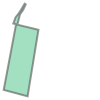

In [35]:
terminal_poly = Polygon(terminal)
terminal_poly

In [222]:
# 포함 여부 확인 (예시 코드)
test_code1 = Point(35.2122322, 129.0307979)
test_code1.within(terminal_poly)

False

---

## 1-2) bnct_car_data

In [213]:
bnct = pd.read_csv('./bnct_car_data.csv', encoding='cp949')
bnct = bnct.drop(bnct.index[0]).reset_index(drop=True)
bnct.head()

,Column2
0,"[{""carLocationInfoId"":""car20220728113347035"",""..."
1,"[{""carLocationInfoId"":""car20220728113347035"",""..."
2,"[{""carLocationInfoId"":""car20220728113347035"",""..."
3,"[{""carLocationInfoId"":""car20220728113347035"",""..."
4,"[{""carLocationInfoId"":""car20220808093451962"",""..."


In [214]:
bnct['Column2'][0]

'[{"carLocationInfoId":"car20220728113347035","carNo":"경남83사1169","parkingYn":"N","lon":128.8316828,"lat":35.0625638,"createDate":"20230901120129753","speed":86,"locationAddress":"부산광역시 강서구 성북동 12"}]'

In [215]:
bnct['carLocationInfoId'], bnct['carNo'], bnct['parkingYn'], bnct['lon'], bnct['lat'], bnct['createDate'], bnct['speed'], bnct['locationAddress'] = zip(*bnct['Column2'].str.split(','))

# Remove unnecessary characters from each column
bnct['carLocationInfoId'] = bnct['carLocationInfoId'].str.replace('"carLocationInfoId":', '').replace('"', '').str.lstrip('[{').str[1:-1]
bnct['carNo'] = bnct['carNo'].str.replace('"carNo":', '').replace('"', '').str[1:-1]
bnct['parkingYn'] = bnct['parkingYn'].str.replace('"parkingYn":', '').replace('"', '').map({'"N"': 0, '"Y"': 1})
bnct['lon'] = bnct['lon'].str.replace('"lon":', '').replace('"', '').astype(float)
bnct['lat'] = bnct['lat'].str.replace('"lat":', '').replace('"', '').astype(float)
bnct['createDate'] = bnct['createDate'].str.replace('"createDate":', '').replace('"', '').str[1:-1].astype(int)
bnct['speed'] = bnct['speed'].str.replace('"speed":', '').replace('"', '').astype(int)
bnct['locationAddress'] = bnct['locationAddress'].str.replace('"locationAddress":', '').replace('"', '').str.rstrip('}]').str[1:-1]


# Drop the original 'details' column
bnct = bnct.drop('Column2', axis=1)
pd.set_option('display.float_format', '{:.7f}'.format)

In [216]:
bnct.head()

,carLocationInfoId,carNo,parkingYn,lon,lat,createDate,speed,locationAddress
0,car20220728113347035,경남83사1169,0,128.8316828,35.0625638,20230901120129753,86,부산광역시 강서구 성북동 12
1,car20220728113347035,경남83사1169,0,128.8304741,35.0607237,20230901120139732,83,부산광역시 강서구 성북동 산 59-3
2,car20220728113347035,경남83사1169,0,128.8318345,35.0627006,20230901151115704,61,부산광역시 강서구 성북동 160
3,car20220728113347035,경남83사1169,0,128.8329747,35.0641092,20230901151125708,65,부산광역시 강서구 성북동 산 59-3
4,car20220808093451962,경북88자1746,0,128.8329817,35.0642599,20230905134857713,68,부산광역시 강서구 눌차동 720


In [217]:
bnct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carLocationInfoId  1753 non-null   object 
 1   carNo              1753 non-null   object 
 2   parkingYn          1753 non-null   int64  
 3   lon                1753 non-null   float64
 4   lat                1753 non-null   float64
 5   createDate         1753 non-null   int64  
 6   speed              1753 non-null   int64  
 7   locationAddress    1753 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 109.7+ KB


# 02. Data Preprocessing

In [295]:
# 데이터 복사
tat_geofence1 = tat_geofence.copy()
bnct1 = bnct.copy()

In [296]:
bnct1.head()

,carLocationInfoId,carNo,parkingYn,lon,lat,createDate,speed,locationAddress
0,car20220728113347035,경남83사1169,0,128.8316828,35.0625638,20230901120129753,86,부산광역시 강서구 성북동 12
1,car20220728113347035,경남83사1169,0,128.8304741,35.0607237,20230901120139732,83,부산광역시 강서구 성북동 산 59-3
2,car20220728113347035,경남83사1169,0,128.8318345,35.0627006,20230901151115704,61,부산광역시 강서구 성북동 160
3,car20220728113347035,경남83사1169,0,128.8329747,35.0641092,20230901151125708,65,부산광역시 강서구 성북동 산 59-3
4,car20220808093451962,경북88자1746,0,128.8329817,35.0642599,20230905134857713,68,부산광역시 강서구 눌차동 720


### createDate 칼럼 분리 (date / time)

In [297]:
## createDate 칼럼 분리(날짜/시간)

bnct1['createDate'] = bnct1['createDate'].astype(str)
bnct1['date'] = bnct1['createDate'].str[:8]
bnct1['time'] = bnct1['createDate'].str[8:]
bnct1 = bnct1.drop(['carLocationInfoId', 'createDate'], axis=1)
bnct1.head()

,carNo,parkingYn,lon,lat,speed,locationAddress,date,time
0,경남83사1169,0,128.8316828,35.0625638,86,부산광역시 강서구 성북동 12,20230901,120129753
1,경남83사1169,0,128.8304741,35.0607237,83,부산광역시 강서구 성북동 산 59-3,20230901,120139732
2,경남83사1169,0,128.8318345,35.0627006,61,부산광역시 강서구 성북동 160,20230901,151115704
3,경남83사1169,0,128.8329747,35.0641092,65,부산광역시 강서구 성북동 산 59-3,20230901,151125708
4,경북88자1746,0,128.8329817,35.0642599,68,부산광역시 강서구 눌차동 720,20230905,134857713


---

### 위도, 경도 0인 경우 삭제

In [298]:
# 위도나 경도가 0인 경우

bnct1[(bnct1['lon'] == 0.0000000) | (bnct1['lat'] == 0.0000000)]

,carNo,parkingYn,lon,lat,speed,locationAddress,date,time
727,경북88자1746,0,0.0000000,0.0000000,0,kotlin.Unit,20231113,223736180
728,대구83아5858,0,0.0000000,0.0000000,0,kotlin.Unit,20231114,044506134
729,대구83아5858,0,0.0000000,0.0000000,0,kotlin.Unit,20231115,090802159
730,경북88자1746,0,0.0000000,0.0000000,0,kotlin.Unit,20231117,231752267
731,경북88자1746,0,0.0000000,0.0000000,0,kotlin.Unit,20231118,225620602
...,...,...,...,...,...,...,...,...
1716,부산95아1290,0,0.0000000,0.0000000,0,,20240126,075948841
1717,경기92아8845,0,0.0000000,0.0000000,0,,20240126,215255651
1718,전남83바8505,0,0.0000000,0.0000000,0,,20240127,043638284
1719,울산80사8766,0,0.0000000,0.0000000,0,,20240131,061110247


In [299]:
# 0인 경우(결측치) 제거

bnct1 = bnct1[(bnct1['lon'] != 0.0000000) & (bnct1['lat'] != 0.0000000)]
bnct1

,carNo,parkingYn,lon,lat,speed,locationAddress,date,time
0,경남83사1169,0,128.8316828,35.0625638,86,부산광역시 강서구 성북동 12,20230901,120129753
1,경남83사1169,0,128.8304741,35.0607237,83,부산광역시 강서구 성북동 산 59-3,20230901,120139732
2,경남83사1169,0,128.8318345,35.0627006,61,부산광역시 강서구 성북동 160,20230901,151115704
3,경남83사1169,0,128.8329747,35.0641092,65,부산광역시 강서구 성북동 산 59-3,20230901,151125708
4,경북88자1746,0,128.8329817,35.0642599,68,부산광역시 강서구 눌차동 720,20230905,134857713
...,...,...,...,...,...,...,...,...
1748,부산90바1762,0,128.8208883,35.0645100,22,부산광역시 강서구 성북동 1526,20240201,104136401
1749,부산90바1762,0,128.8218491,35.0649248,0,부산광역시 강서구 성북동 1526,20240201,104213604
1750,부산90바1762,0,128.8229250,35.0647083,0,부산광역시 강서구 성북동 1522,20240201,104316075
1751,부산90바1762,0,128.8257856,35.0650843,11,부산광역시 강서구 성북동 952-2,20240201,104338841


In [300]:
# 확인

bnct1[(bnct1['lon'] == 0.0000000) | (bnct1['lat'] == 0.0000000)]

,carNo,parkingYn,lon,lat,speed,locationAddress,date,time


---

### 분포 확인

In [306]:
terminal = list(zip(tat_geofence['Column4'], tat_geofence['Column5']))
terminal

[(35.06676648, 128.8049116),
 (35.06132997, 128.8063624),
 (35.06414576, 128.821294),
 (35.06351854, 128.8214816),
 (35.06404084, 128.8228922),
 (35.06491022, 128.8239865),
 (35.06610244, 128.8259901),
 (35.06633953, 128.8258345),
 (35.06577409, 128.8246264),
 (35.06503645, 128.823575),
 (35.06443491, 128.8212121),
 (35.06923279, 128.8200467)]

In [307]:
bnct_loc = list(zip(bnct1['lat'], bnct1['lon']))
bnct_loc

[(35.0625638, 128.8316828),
 (35.0607237, 128.8304741),
 (35.0627006, 128.8318345),
 (35.0641092, 128.8329747),
 (35.0642599, 128.8329817),
 (35.0613745, 128.8309621),
 (35.0600548, 128.8300904),
 (35.0609178, 128.8308063),
 (35.0640329, 128.8329288),
 (35.0690459, 128.8334677),
 (35.067846, 128.8325206),
 (35.0695301, 128.8333509),
 (35.0678659, 128.8324431),
 (35.0667219, 128.8324693),
 (35.0667093, 128.8324515),
 (35.0667093, 128.8324515),
 (35.0667095, 128.8324663),
 (35.066717, 128.8324692),
 (35.0667095, 128.8324663),
 (35.0683281, 128.8349133),
 (35.0678653, 128.8324282),
 (35.0671373, 128.8323371),
 (35.0668658, 128.8324085),
 (35.0673143, 128.8323007),
 (35.0672105, 128.8323352),
 (35.0667249, 128.8325299),
 (35.0667219, 128.8324693),
 (35.066717, 128.8324692),
 (35.0670874, 128.8323535),
 (35.0667086, 128.832463),
 (35.0667095, 128.8324663),
 (35.0667086, 128.832463),
 (35.0667187, 128.8325115),
 (35.067462, 128.8324415),
 (35.0668305, 128.8324589),
 (35.0678653, 128.8324282)

/var/folders/zg/42k25fm91gn9y2_rxlg_vnvc0000gn/T/ipykernel_33385/862774900.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


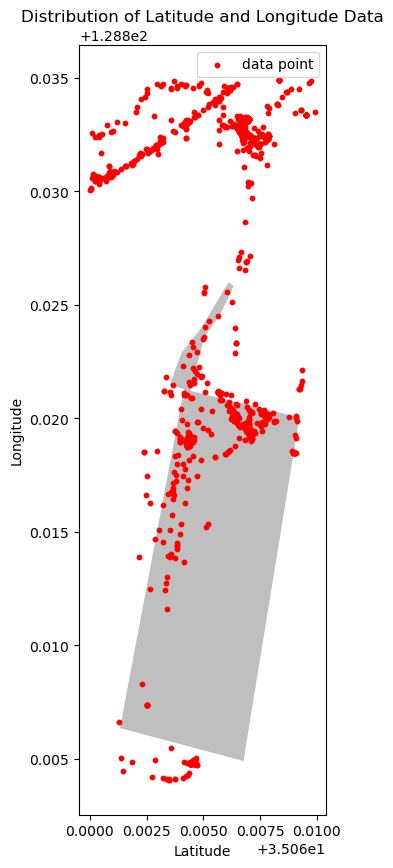

In [310]:
# Create a GeoDataFrame for the terminal polygon
terminal_gdf = gpd.GeoDataFrame(geometry=[Polygon(terminal)])

# Assuming bnct1 is your DataFrame with latitude and longitude columns
# Make sure that bnct1 has 'lon' and 'lat' columns
bnct1_gdf = gpd.GeoDataFrame(bnct1, geometry=gpd.points_from_xy(bnct1['lat'], bnct1['lon']))

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 10))
terminal_gdf.plot(ax=ax, alpha=0.5, color='gray', label='terminal area')  # Plot terminal area
bnct1_gdf.plot(ax=ax, marker='o', color='red', markersize=10, label='data point')  # Plot data points

# Add legend
ax.legend()

plt.title('Distribution of Latitude and Longitude Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

---

### 위의 분포표 기준 경도가 0.030(128.830)보다 큰 데이터 삭제

참고) 1.288e2 = 128.8

- 0.035 = 128.835
- 0.005 = 128.805

In [321]:
bnct2 = bnct1.copy()
bnct2.head()

,carNo,parkingYn,lon,lat,speed,locationAddress,date,time
0,경남83사1169,0,128.8316828,35.0625638,86,부산광역시 강서구 성북동 12,20230901,120129753
1,경남83사1169,0,128.8304741,35.0607237,83,부산광역시 강서구 성북동 산 59-3,20230901,120139732
2,경남83사1169,0,128.8318345,35.0627006,61,부산광역시 강서구 성북동 160,20230901,151115704
3,경남83사1169,0,128.8329747,35.0641092,65,부산광역시 강서구 성북동 산 59-3,20230901,151125708
4,경북88자1746,0,128.8329817,35.0642599,68,부산광역시 강서구 눌차동 720,20230905,134857713


In [316]:
bnct2['lon'].describe()

count   1649.0000000
mean     128.8264881
std        0.0081406
min      128.8040867
25%      128.8194203
50%      128.8320883
75%      128.8331567
max      128.8349133
Name: lon, dtype: float64

In [325]:
bnct2 = bnct2[bnct2['lon'] < 128.83]
bnct2['lon'].describe()

count   693.0000000
mean    128.8178094
std       0.0051643
min     128.8040867
25%     128.8189608
50%     128.8194166
75%     128.8197457
max     128.8296900
Name: lon, dtype: float64

/var/folders/zg/42k25fm91gn9y2_rxlg_vnvc0000gn/T/ipykernel_33385/61753628.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


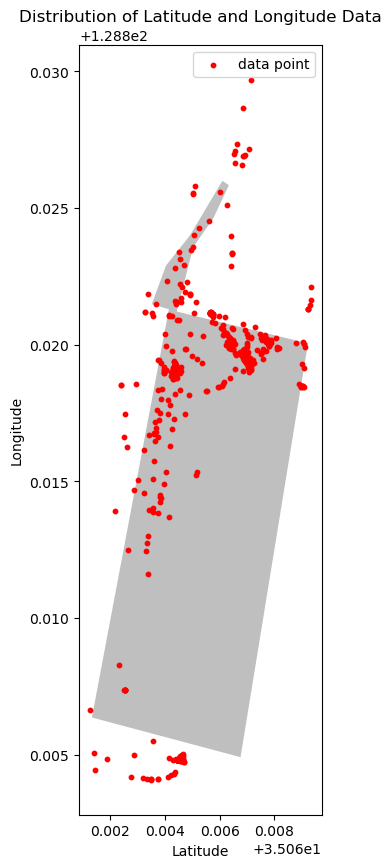

In [331]:
## 분포 재확인

# Create a GeoDataFrame for the terminal polygon
terminal_gdf = gpd.GeoDataFrame(geometry=[Polygon(terminal)])

# Assuming bnct1 is your DataFrame with latitude and longitude columns
# Make sure that bnct1 has 'lon' and 'lat' columns
bnct2_gdf = gpd.GeoDataFrame(bnct2, geometry=gpd.points_from_xy(bnct2['lat'], bnct2['lon']))

# 0P0lotting the map
fig, ax = plt.subplots(figsize=(10, 10))
terminal_gdf.plot(ax=ax, alpha=0.5, color='gray', label='terminal area')  # Plot terminal area
bnct2_gdf.plot(ax=ax, marker='o', color='red', markersize=10, label='data point')  # Plot data points

# Add legend
ax.legend()

plt.title('Distribution of Latitude and Longitude Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

---

In [332]:
bnct2.head()

,carNo,parkingYn,lon,lat,speed,locationAddress,date,time
61,부산90바1762,0,128.8271546,35.0670671,0,부산광역시 강서구 성북동 1522,20230913,114157026
62,부산90바1762,0,128.8268845,35.0668673,0,부산광역시 강서구 성북동 1522,20230913,114213502
63,부산90바1762,0,128.8268934,35.0668797,0,부산광역시 강서구 성북동 1522,20230913,114235293
64,부산90바1762,0,128.8211472,35.0650617,0,부산광역시 강서구 성북동 1522,20230913,114313765
65,부산90바1762,0,128.8188353,35.0643206,0,부산광역시 강서구 성북동 1522,20230913,114351433


In [334]:
bnct2['carNo'].value_counts()

carNo
부산90바1762    578
84마0700      115
Name: count, dtype: int64

ㄴ 이동차량 총 2대

In [335]:
bnct2['date'].value_counts()

date
20230913    306
20231113    115
20231023     99
20231205     86
20240201     44
20231129     43
Name: count, dtype: int64

ㄴ 이동날짜 총 6일

---

In [342]:
bnct2[bnct2['date'] == '20230913'].carNo.value_counts()

carNo
부산90바1762    306
Name: count, dtype: int64

In [344]:
bnct2[bnct2['date'] == '20231113'].carNo.value_counts()

carNo
84마0700    115
Name: count, dtype: int64

In [345]:
bnct2[bnct2['date'] == '20231023'].carNo.value_counts()

carNo
부산90바1762    99
Name: count, dtype: int64

In [346]:
bnct2[bnct2['date'] == '20231205'].carNo.value_counts()

carNo
부산90바1762    86
Name: count, dtype: int64

In [341]:
bnct2[bnct2['date'] == '20240201'].carNo.value_counts()

carNo
부산90바1762    44
Name: count, dtype: int64

In [347]:
bnct2[bnct2['date'] == '20231129'].carNo.value_counts()

carNo
부산90바1762    43
Name: count, dtype: int64